
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_1.32
## ( *A35-39.h5* - more `loss` and `[metrics]` Functions - `epochs=1000` )

---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 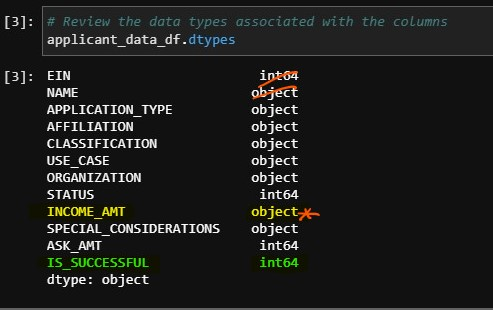

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 35+

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A35 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A35 =  (number_input_features + number_output_neurons_A35) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A35

57

In [21]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A35 =  (hidden_nodes_layer1_A35 + number_output_neurons_A35) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A35

29

In [22]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A35 =  (hidden_nodes_layer2_A35 + number_output_neurons_A35) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A35

15

In [23]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A35 =  (hidden_nodes_layer3_A35 + number_output_neurons_A35) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A35

8

In [24]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A35 =  (hidden_nodes_layer4_A35 + number_output_neurons_A35) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A35

4

In [25]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A35 =  (hidden_nodes_layer5_A35 + number_output_neurons_A35) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A35

2

In [26]:
# Create and Display the Sequential Model Instance 
# for Model A35
nn_A35 = Sequential() 

# Add the first hidden layer
nn_A35.add(Dense(units=hidden_nodes_layer1_A35, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A35.add(Dense(units=hidden_nodes_layer2_A35, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A35.add(Dense(units=hidden_nodes_layer3_A35, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A35.add(Dense(units=hidden_nodes_layer4_A35, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A35.add(Dense(units=hidden_nodes_layer5_A35, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A35.add(Dense(units=hidden_nodes_layer6_A35, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A35.add(Dense(units=number_output_neurons_A35, activation="sigmoid"))

# Display the Sequential model summary
nn_A35.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                6555      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [27]:
# Compile the Sequential model
nn_A35.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [28]:
# Fit the model using 50 epochs and the training data
fit_model_A35 = nn_A35.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 2s 2ms/step - loss: 0.2173 - accuracy: 0.6673 - val_loss: 0.1848 - val_accuracy: 0.7372
Epoch 2/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1881 - accuracy: 0.7238 - val_loss: 0.1834 - val_accuracy: 0.7375
Epoch 3/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.7299 - val_loss: 0.1819 - val_accuracy: 0.7400
Epoch 4/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1852 - accuracy: 0.7314 - val_loss: 0.1829 - val_accuracy: 0.7361
Epoch 5/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1855 - accuracy: 0.7300 - val_loss: 0.1824 - val_accuracy: 0.7375
Epoch 6/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1838 - accuracy: 0.7307 - val_loss: 0.1825 - val_accuracy: 0.7335
Epoch 7/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1815 - accuracy: 0.7353 - val_loss: 0.1820 - val_accuracy:

In [29]:
print("Alternative Model 35 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A35.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 35 Results
Loss: 0.18910333514213562, Accuracy: 0.7280466556549072


# Alternative Model 36+

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A36 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A36 =  (number_input_features + number_output_neurons_A36) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A36

57

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A36 =  (hidden_nodes_layer1_A36 + number_output_neurons_A36) // 2
hidden_nodes_layer2_A36 = hidden_nodes_layer1_A36

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A36

57

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A36 =  (hidden_nodes_layer2_A36 + number_output_neurons_A36) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A36

29

In [35]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A36 =  (hidden_nodes_layer3_A36 + number_output_neurons_A36) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A36

15

In [36]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A36 =  (hidden_nodes_layer4_A36 + number_output_neurons_A36) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A36

8

In [37]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A36 = (hidden_nodes_layer5_A36 + number_output_neurons_A36) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A36

4

In [38]:
# Create and Display the Sequential Model Instance 
# for Model A36
nn_A36 = Sequential() 

# Add the first hidden layer
nn_A36.add(Dense(units=hidden_nodes_layer1_A36, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A36.add(Dense(units=hidden_nodes_layer2_A36, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A36.add(Dense(units=hidden_nodes_layer3_A36, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A36.add(Dense(units=hidden_nodes_layer4_A36, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A36.add(Dense(units=hidden_nodes_layer5_A36, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A36.add(Dense(units=hidden_nodes_layer6_A36, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A36.add(Dense(units=number_output_neurons_A36, activation="sigmoid"))

# Display the Sequential model summary
nn_A36.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 57)                6555      
_________________________________________________________________
dense_8 (Dense)              (None, 57)                3306      
_________________________________________________________________
dense_9 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [39]:
# Compile the Sequential model
nn_A36.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model_A36 = nn_A36.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 3s 3ms/step - loss: 0.2255 - mse: 0.2255 - val_loss: 0.2006 - val_mse: 0.2006
Epoch 2/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.2001 - mse: 0.2001 - val_loss: 0.1919 - val_mse: 0.1919
Epoch 3/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1925 - mse: 0.1925 - val_loss: 0.1874 - val_mse: 0.1874
Epoch 4/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1892 - mse: 0.1892 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 5/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1885 - mse: 0.1885 - val_loss: 0.1848 - val_mse: 0.1848
Epoch 6/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1886 - mse: 0.1886 - val_loss: 0.1855 - val_mse: 0.1855
Epoch 7/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1895 - mse: 0.1895 - val_loss: 0.1836 - val_mse: 0.1836
Epoch 8/1000
563/563 [==============================] - 1s 2ms

In [41]:
print("Alternative Model 36 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A36.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 36 Results
Loss: 0.18773598968982697, Accuracy: 0.18773598968982697


# Alternative Model 37+

In [42]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [43]:
# Define the number of neurons in the output layer
number_output_neurons_A37 = 1

In [44]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A37 =  (number_input_features + number_output_neurons_A37) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A37

57

In [45]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A37 =  (hidden_nodes_layer1_A37 + number_output_neurons_A37) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A37

29

In [46]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A37 =  (hidden_nodes_layer2_A37 + number_output_neurons_A37) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A37

15

In [47]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A37 =  (hidden_nodes_layer3_A37 + number_output_neurons_A37) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A37

8

In [48]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A37 =  (hidden_nodes_layer4_A37 + number_output_neurons_A37) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A37

4

In [49]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A37 =  (hidden_nodes_layer5_A37 + number_output_neurons_A37) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A37

2

In [50]:
# Create and Display the Sequential Model Instance 
# for Model A37
nn_A37 = Sequential() 

# Add the first hidden layer
nn_A37.add(Dense(units=hidden_nodes_layer1_A37, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A37.add(Dense(units=hidden_nodes_layer2_A37, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A37.add(Dense(units=hidden_nodes_layer3_A37, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A37.add(Dense(units=hidden_nodes_layer4_A37, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A37.add(Dense(units=hidden_nodes_layer5_A37, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A37.add(Dense(units=hidden_nodes_layer6_A37, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A37.add(Dense(units=number_output_neurons_A37, activation="sigmoid"))

# Display the Sequential model summary
nn_A37.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_15 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [51]:
# Compile the Sequential model
nn_A37.compile(loss="mse", optimizer="adam", metrics=["Precision"])

In [52]:
# Fit the model using 50 epochs and the training data
fit_model_A37 = nn_A37.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 2s 3ms/step - loss: 0.2115 - precision: 0.6554 - val_loss: 0.1835 - val_precision: 0.7355
Epoch 2/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1874 - precision: 0.7185 - val_loss: 0.1834 - val_precision: 0.7418
Epoch 3/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1873 - precision: 0.7117 - val_loss: 0.1820 - val_precision: 0.7412
Epoch 4/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1862 - precision: 0.7219 - val_loss: 0.1829 - val_precision: 0.7466
Epoch 5/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1846 - precision: 0.7210 - val_loss: 0.1827 - val_precision: 0.7386
Epoch 6/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1871 - precision: 0.7142 - val_loss: 0.1825 - val_precision: 0.7425
Epoch 7/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1810 - precision: 0.7322 - val_loss: 0.1821 - 

In [53]:
print("Alternative Model 37 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A37.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 37 Results
Loss: 0.18874773383140564, Accuracy: 0.7238307595252991


# Alternative Model 38+

In [54]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [55]:
# Define the number of neurons in the output layer
number_output_neurons_A38 = 1

In [56]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A38 =  (number_input_features + number_output_neurons_A38) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A38

57

In [57]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A38 =  (hidden_nodes_layer1_A38 + number_output_neurons_A38) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A38

29

In [58]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A38 =  (hidden_nodes_layer2_A38 + number_output_neurons_A38) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A38

15

In [59]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A38 =  (hidden_nodes_layer3_A38 + number_output_neurons_A38) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A38

8

In [60]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A38 =  (hidden_nodes_layer4_A38 + number_output_neurons_A38) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A38

4

In [61]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A38 =  (hidden_nodes_layer5_A38 + number_output_neurons_A38) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A38

2

In [62]:
# Create and Display the Sequential Model Instance 
# for Model A38
nn_A38 = Sequential() 

# Add the first hidden layer
nn_A38.add(Dense(units=hidden_nodes_layer1_A38, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A38.add(Dense(units=hidden_nodes_layer2_A38, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A38.add(Dense(units=hidden_nodes_layer3_A38, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A38.add(Dense(units=hidden_nodes_layer4_A38, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A38.add(Dense(units=hidden_nodes_layer5_A38, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A38.add(Dense(units=hidden_nodes_layer6_A38, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A38.add(Dense(units=number_output_neurons_A38, activation="sigmoid"))

# Display the Sequential model summary
nn_A38.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_22 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [63]:
# Compile the Sequential model
nn_A38.compile(loss="mse", optimizer="adam", metrics=["Recall"])

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A38 = nn_A38.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 2s 2ms/step - loss: 0.2206 - recall: 0.7392 - val_loss: 0.1849 - val_recall: 0.7695
Epoch 2/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1910 - recall: 0.7704 - val_loss: 0.1826 - val_recall: 0.7861
Epoch 3/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1856 - recall: 0.7863 - val_loss: 0.1831 - val_recall: 0.7994
Epoch 4/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1848 - recall: 0.7958 - val_loss: 0.1833 - val_recall: 0.7840
Epoch 5/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1841 - recall: 0.7902 - val_loss: 0.1840 - val_recall: 0.7952
Epoch 6/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1844 - recall: 0.7894 - val_loss: 0.1826 - val_recall: 0.8070
Epoch 7/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1819 - recall: 0.7953 - val_loss: 0.1832 - val_recall: 0.7828
Epoch 8/1000
563/563

In [65]:
print("Alternative Model 38 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A38.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 38 Results
Loss: 0.18912290036678314, Accuracy: 0.8071838021278381


# Alternative Model 39+

In [66]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [67]:
# Define the number of neurons in the output layer
number_output_neurons_A39 = 1

In [68]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A39 =  (number_input_features + number_output_neurons_A39) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A39

57

In [69]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A39 =  (hidden_nodes_layer1_A39 + number_output_neurons_A39) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A39

29

In [70]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A39 =  (hidden_nodes_layer2_A39 + number_output_neurons_A39) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A39

15

In [71]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A39 =  (hidden_nodes_layer3_A39 + number_output_neurons_A39) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A39

8

In [72]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A39 =  (hidden_nodes_layer4_A39 + number_output_neurons_A39) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A39

4

In [73]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A39 =  (hidden_nodes_layer5_A39 + number_output_neurons_A39) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A39

2

In [74]:
# Create and Display the Sequential Model Instance 
# for Model A39
nn_A39 = Sequential() 

# Add the first hidden layer
nn_A39.add(Dense(units=hidden_nodes_layer1_A39, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A39.add(Dense(units=hidden_nodes_layer2_A39, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A39.add(Dense(units=hidden_nodes_layer3_A39, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A39.add(Dense(units=hidden_nodes_layer4_A39, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A39.add(Dense(units=hidden_nodes_layer5_A39, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A39.add(Dense(units=hidden_nodes_layer6_A39, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A39.add(Dense(units=number_output_neurons_A39, activation="sigmoid"))

# Display the Sequential model summary
nn_A39.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_29 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_30 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [75]:
# Compile the Sequential model
nn_A39.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [76]:
# Fit the model using 50 epochs and the training data
fit_model_A39 = nn_A39.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 2s 2ms/step - loss: 0.2291 - accuracy: 0.6748 - val_loss: 0.2006 - val_accuracy: 0.7321
Epoch 2/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1987 - accuracy: 0.7208 - val_loss: 0.1903 - val_accuracy: 0.7367
Epoch 3/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1926 - accuracy: 0.7252 - val_loss: 0.1872 - val_accuracy: 0.7368
Epoch 4/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.7311 - val_loss: 0.1862 - val_accuracy: 0.7389
Epoch 5/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1859 - accuracy: 0.7377 - val_loss: 0.1857 - val_accuracy: 0.7381
Epoch 6/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1863 - accuracy: 0.7344 - val_loss: 0.1849 - val_accuracy: 0.7406
Epoch 7/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1875 - accuracy: 0.7279 - val_loss: 0.1849 - val_accuracy:

In [77]:
print("Alternative Model 39 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_mse, model_accuracy = nn_A39.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_mse}, Accuracy: {model_accuracy}")

Alternative Model 39 Results
Loss: 0.18815024197101593, Accuracy: 0.7297959327697754


---
---

### Step 2: After completing your models, display the accuracy scores achieved by each model, and compare the results.

In [78]:
print("Alternative Model 35 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A35.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 35 Results
Loss: 0.18910333514213562, Accuracy: 0.7280466556549072


<AxesSubplot:title={'center':'model_accuracy: A35'}>

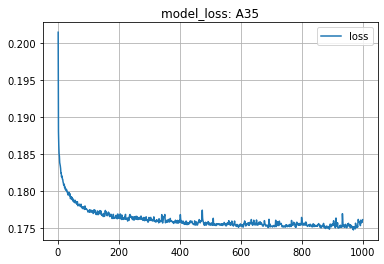

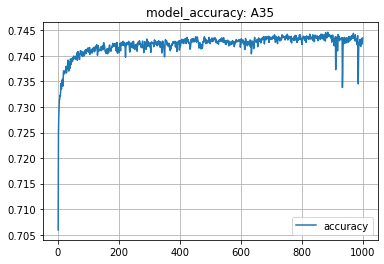

In [79]:
model_plot = pd.DataFrame(fit_model_A35.history, index=range(1, len(fit_model_A35.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A35")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A35")

In [80]:
print("Alternative Model 36 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_mse = nn_A36.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, MSE: {model_mse}")

Alternative Model 36 Results
Loss: 0.18773598968982697, MSE: 0.18773598968982697


<AxesSubplot:title={'center':'model_mse: A36'}>

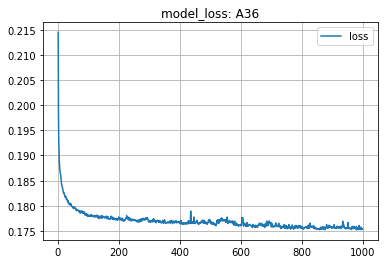

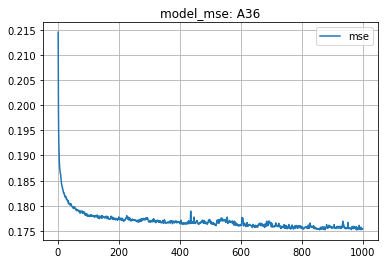

In [81]:
model_plot = pd.DataFrame(fit_model_A36.history, index=range(1, len(fit_model_A36.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A36")
model_plot.plot(y="mse", grid=True, title="model_mse: A36")

In [82]:
print("Alternative Model 37 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_precision = nn_A37.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Precision: {model_precision}")

Alternative Model 37 Results
Loss: 0.18874773383140564, Precision: 0.7238307595252991


<AxesSubplot:title={'center':'model_precision: A37'}>

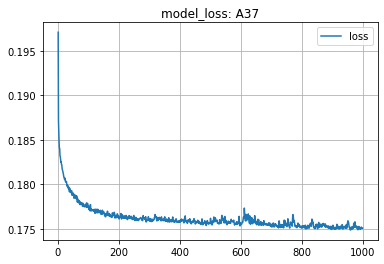

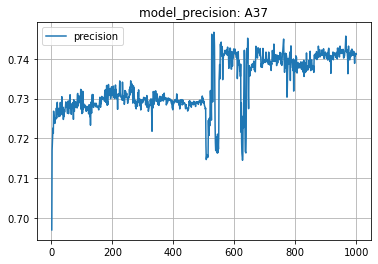

In [83]:
model_plot = pd.DataFrame(fit_model_A37.history, index=range(1, len(fit_model_A37.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A37")
model_plot.plot(y="precision", grid=True, title="model_precision: A37")

In [84]:
print("Alternative Model 38 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_recall = nn_A38.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Recall: {model_recall}")

Alternative Model 38 Results
Loss: 0.18912290036678314, Recall: 0.8071838021278381


<AxesSubplot:title={'center':'model_recall: A38'}>

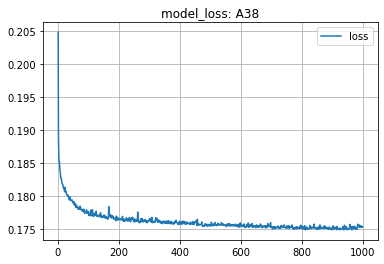

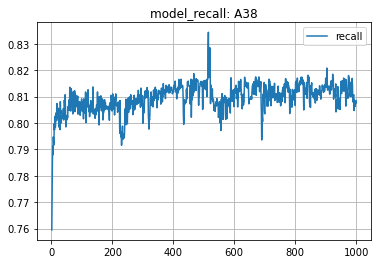

In [85]:
model_plot = pd.DataFrame(fit_model_A38.history, index=range(1, len(fit_model_A38.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A38")
model_plot.plot(y="recall", grid=True, title="model_recall: A38")

In [86]:
print("Alternative Model 39 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A39.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 39 Results
Loss: 0.18815024197101593, Accuracy: 0.7297959327697754


<AxesSubplot:title={'center':'model_accuracy: A39'}>

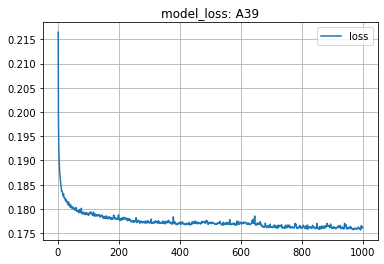

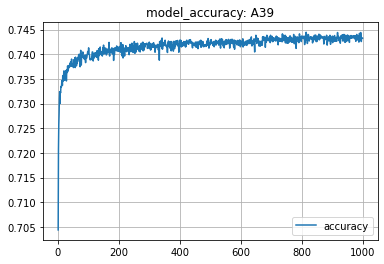

In [87]:
model_plot = pd.DataFrame(fit_model_A39.history, index=range(1, len(fit_model_A39.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A39", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A39", grid=True)

### Step 2(b): Plot and Compare the Results of each Alternative Model

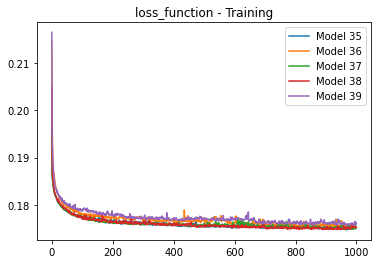

In [88]:
# Day 14-2 cell [62]
plt.plot(fit_model_A35.history["loss"])
plt.plot(fit_model_A36.history["loss"])
plt.plot(fit_model_A37.history["loss"])
plt.plot(fit_model_A38.history["loss"])
plt.plot(fit_model_A39.history["loss"])

plt.title("loss_function - Training")
plt.legend(["Model 35",
            "Model 36",
            "Model 37",
            "Model 38",
            "Model 39"
           ])
plt.show()

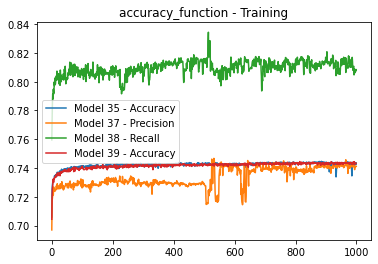

In [89]:
# Day 14-2 cell [62]
plt.plot(fit_model_A35.history["accuracy"])
# plt.plot(fit_model_A36.history["mse"])
plt.plot(fit_model_A37.history["precision"])
plt.plot(fit_model_A38.history["recall"])
plt.plot(fit_model_A39.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["Model 35 - Accuracy",
#             "Model 36",
            "Model 37 - Precision",
            "Model 38 - Recall",
            "Model 39 - Accuracy"
           ])
plt.show()

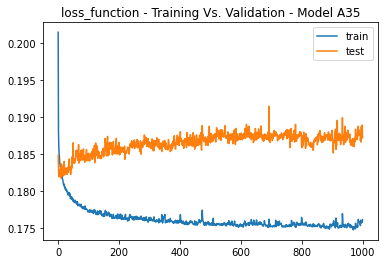

In [90]:
# Train vs test for shallow net
plt.plot(fit_model_A35.history["loss"])
plt.plot(fit_model_A35.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A35")
plt.legend(["train", "test"])
plt.show()

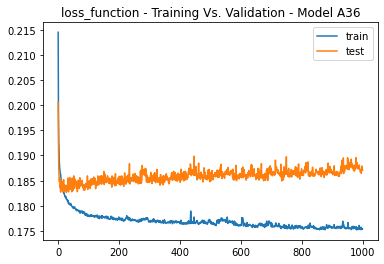

In [91]:
# Train vs test for deep net
plt.plot(fit_model_A36.history["loss"])
plt.plot(fit_model_A36.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A36")
plt.legend(["train", "test"])
plt.show()

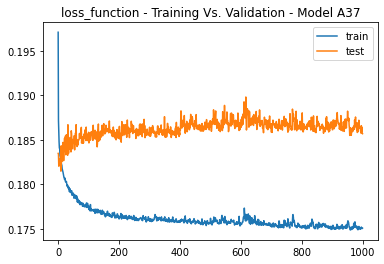

In [92]:
# Train vs test for deep net
plt.plot(fit_model_A37.history["loss"])
plt.plot(fit_model_A37.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A37")
plt.legend(["train", "test"])
plt.show()

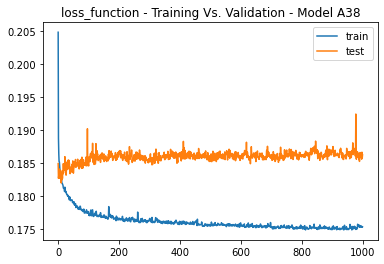

In [93]:
# Train vs test for deep net
plt.plot(fit_model_A38.history["loss"])
plt.plot(fit_model_A38.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A38")
plt.legend(["train", "test"])
plt.show()

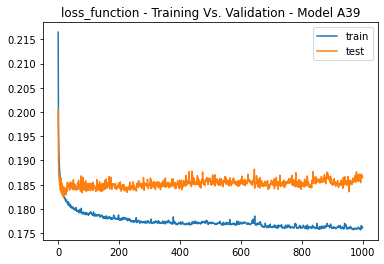

In [94]:
# Train vs test for deep net
plt.plot(fit_model_A39.history["loss"])
plt.plot(fit_model_A39.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A39")
plt.legend(["train", "test"])
plt.show()

# ================================

### Step 3: Save each of your alternative models as an HDF5 file.


In [95]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A35.h5")
# Export your model to a HDF5 file
nn_A35.save(file_path)

In [96]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A36.h5")
# Export your model to a HDF5 file
nn_A36.save(file_path)

In [97]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A37.h5")
# Export your model to a HDF5 file
nn_A37.save(file_path)

In [98]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A38.h5")
# Export your model to a HDF5 file
nn_A38.save(file_path)

In [99]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/Alt_Models/AlphabetSoup_A39.h5")
# Export your model to a HDF5 file
nn_A39.save(file_path)